In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, minmax_scale
import seaborn as sns


In [4]:
#read and load data file 'Algerian_forest_fires_cleaned'

Algerian_data=r'C:\Users\anjuk\OneDrive\Desktop\Semesters\Third Sem\Neural Networking\Algerian_forest_fires_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(Algerian_data)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [5]:
#Finding Missing values

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [6]:
#Counting duplicated values

df.duplicated().sum()


0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [8]:
# Dropping less significant features
forest_data = df.drop(['day', 'month', 'year', 'Classes'],axis=1)
forest_data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1


In [9]:
# Descriptive analysis
forest_data.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


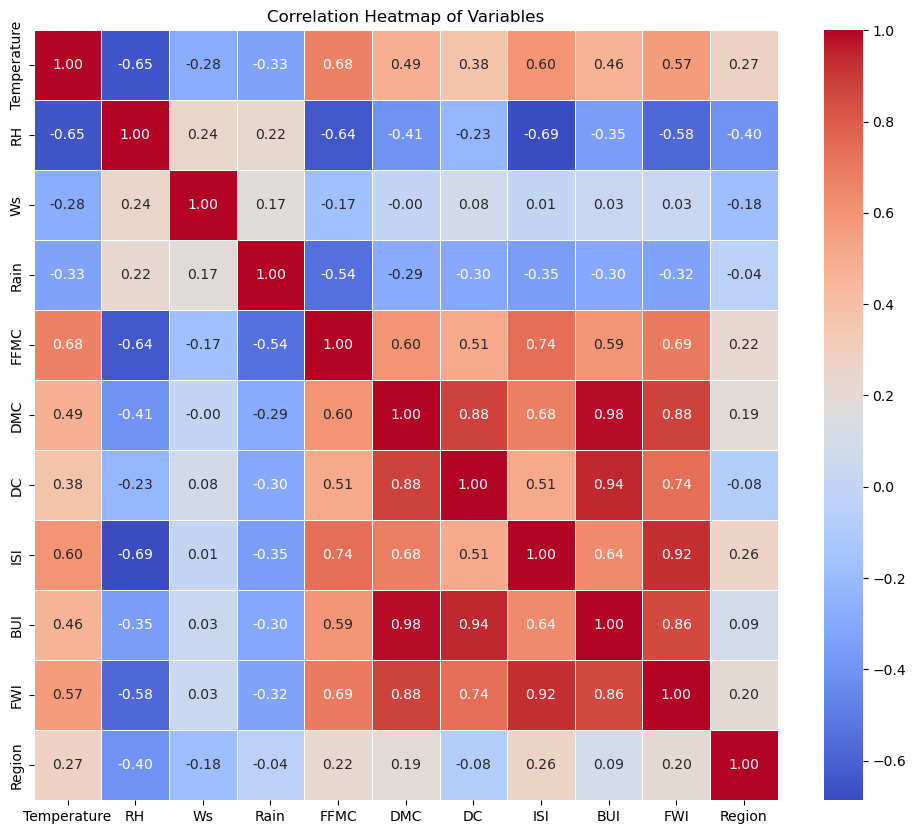

In [10]:
# Creating correlation heatmap to understand the relationship between features
plt.figure(figsize=(12, 10))
correlation_matrix = forest_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

<Axes: >

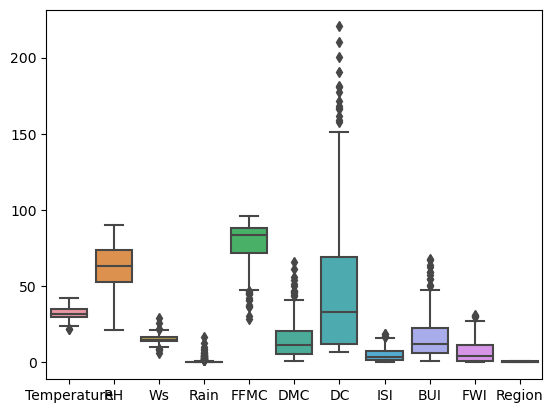

In [11]:
# Creating boxplot for the variables
sns.boxplot(forest_data)

In [12]:
# Calcualting Q1, Q3 and IQR to handle outliers
Q1 = forest_data.quantile(0.25)
Q3 = forest_data.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1

# Filter out outliers
forest_data = forest_data[~((forest_data < (Q1 - threshold * IQR)) | (forest_data > (Q3 + threshold * IQR))).any(axis=1)]
#Printing the number of records after eliminating outlier
print(f"DataFrame without outliers shape: {forest_data.shape}")


DataFrame without outliers shape: (148, 11)


<Axes: >

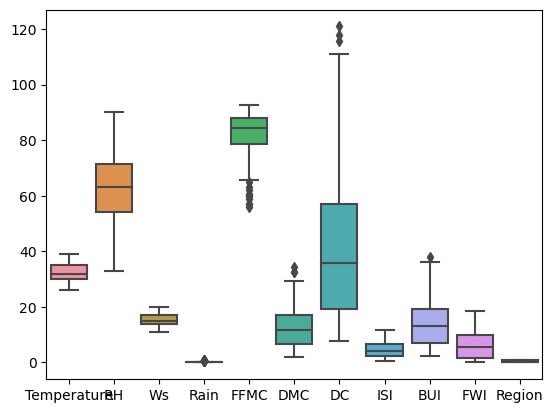

In [13]:
#Boxplot after removing outliers

sns.boxplot(forest_data)

In [14]:
#Defining indipendent and dependent variables
x=forest_data.drop(columns=['FWI'])# Indipendent variables except FWI
y=forest_data['FWI']


In [15]:
#Split data into 80% train and 20 % test data random selection set as 44
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

In [16]:
#Scaling data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

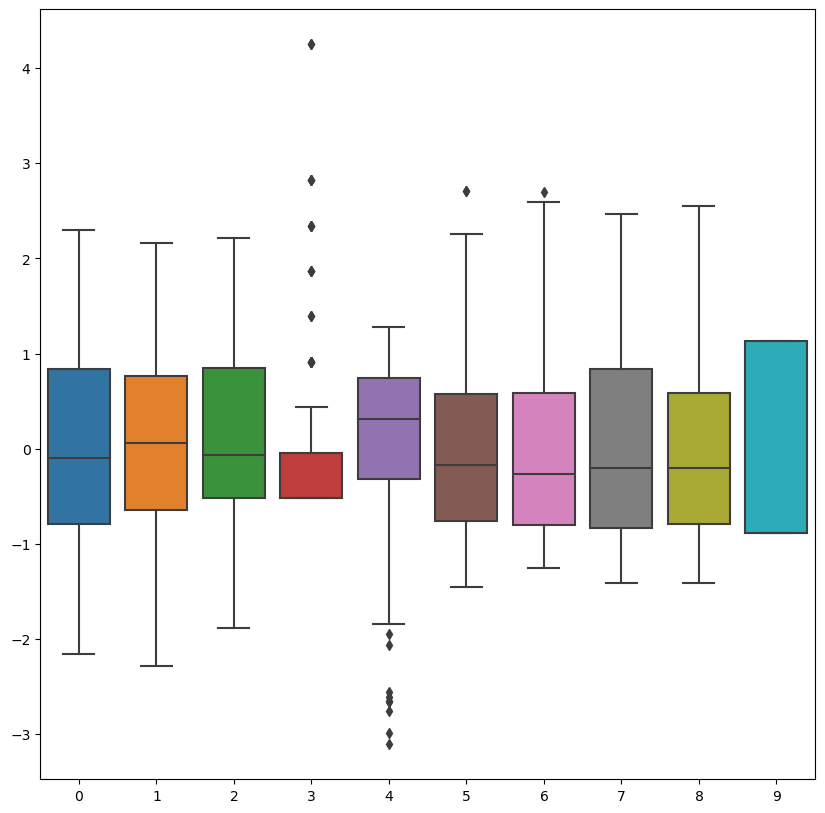

In [17]:
#outliers
plt.figure(figsize=(10,10))
sns.boxplot(data=x_train_scaled)
plt.show()

In [18]:
#Model Fitting

lr=LinearRegression()
lr.fit(x_train_scaled, y_train)#Taking the data after scaling


LinearRegression()

In [19]:
lr.coef_, lr.intercept_

(array([ 0.12720661,  0.15506497, -0.06069415, -0.02026187, -0.64937266,
        -0.48282113, -0.39213544,  4.14695328,  2.68045559, -0.06487442]),
 6.24406779661017)

In [20]:
#prediction
y_pred = lr.predict(x_test_scaled)

In [21]:
#Finding MSE,MAE and r2
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Model MSE : ", mse)
print(" Model MAE : ", mae)
print(" Model R2 : ", r2)

 Model MSE :  0.17664682903883447
 Model MAE :  0.29098486582468563
 Model R2 :  0.9912146309877107


In [22]:
# calculate adjusted r2

r2_adj = 1 - ((1-r2)*(len(y_test)-1))/(len(y_test)-x_test.shape[1]-1)
r2_adj

0.98659075256019

In [299]:
#Import pickle
import pickle 

#Dumping the model objective into pickle file.
with open('linear_regression_model.pkl', 'wb') as file1:
    pickle.dump(lr, file1)
with open('scaler_model.pkl', 'wb') as file2:
    pickle.dump(scaler, file2)

In [300]:
#Read the pickle file

with open('linear_regression_model.pkl', 'rb') as file1:
    loadfilemodel = pickle.load(file1)
with open('scaler_model.pkl', 'rb') as file2:
    loadfilescalar = pickle.load(file2)


In [301]:
#prediction on unseen data

new_data_x = [[30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1],
[28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,1],
[27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0],
[24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,1],
[24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,1],
[27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,1]]

new_data_Y = [6.6,0.6,0.4,0.1,0.0,0.2]

In [302]:
scaleddatax = loadfilescalar.transform(new_data_x)

C:\Users\anjuk\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [303]:
#Predicting for unwanted data
predict_Y = loadfilemodel.predict(scaleddatax)
mse = mean_squared_error(new_data_Y,predict_Y)
mae = mean_absolute_error(new_data_Y,predict_Y)
rsq = r2_score(new_data_Y,predict_Y)
print("MSE : ", mse)
print("MAE : ", mae)
print("R2 : ", rsq)

MSE :  0.10902205775235928
MAE :  0.2728258887855795
R2 :  0.9806058502787719


## Conclusion

### When i trained data using Linear Regression model ,got accuracy which was less than 50% while considering only few features. By increasing the features, data fitted into the model more perfectly and ended up with getting 99% of r2 score. Here i have divided data into 80% training data and 20% testing data. Model fitting has been done by following scaling using standard sclar function. After importing pickle file ,model object has been dumped for the purpose of resue. To check the reusability it readed from the saved file and gave some random data to check the accuracy . After giving values here i got 98% of r2 score.